# Projeto Final C.D.
## Clusterização de jogadores do Fifa 17

In [32]:
import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp

from matplotlib import style
style.use("ggplot")
from sklearn.cluster import KMeans

In [33]:
# https://pythonprogramming.net/flat-clustering-machine-learning-python-scikit-learn/

# link tutorial de clusterização usando python e algoritimo de K-means

In [34]:
#Lendo banco de dados
dados=pd.read_excel("FUT_17_Players.xlsx", sep=',')


In [35]:
dados.shape

(14501, 78)

In [36]:
dados.head()

,id,commonName,firstName,headshotImgUrl,lastName,league,nation,club,headshot,specialImages,...,rawAttributeChemistryBonus,isLoan,squadPosition,itemType,discardValue,modelName,baseId,rating,created_at,updated_at
0,190043,Pelé,Edson,https://fifa17.content.easports.com/fifa/fltOn...,Arantes Nascimento,2118,54,112658,"O:8:\stdClass\"":3:{s:11:\""largeImgUrl\"";s:148:...","O:8:\stdClass\"":2:{s:15:\""largeTOTWImgUrl\"";N;...",...,NaN,NaN,NaN,player,NaN,FUTPlayerItem,190043,95,2016-09-21 16:33:58,2016-09-21 16:33:58
1,20801,Cristiano Ronaldo,C. Ronaldo,https://fifa17.content.easports.com/fifa/fltOn...,dos Santos Aveiro,53,38,243,"O:8:\stdClass\"":3:{s:11:\""largeImgUrl\"";s:147:...","O:8:\stdClass\"":2:{s:15:\""largeTOTWImgUrl\"";N;...",...,NaN,NaN,NaN,player,NaN,FUTPlayerItem,20801,94,2016-09-21 16:33:58,2016-09-21 16:33:58
2,158023,NaN,Lionel,https://fifa17.content.easports.com/fifa/fltOn...,Messi,53,52,241,"O:8:\stdClass\"":3:{s:11:\""largeImgUrl\"";s:148:...","O:8:\stdClass\"":2:{s:15:\""largeTOTWImgUrl\"";N;...",...,NaN,NaN,NaN,player,NaN,FUTPlayerItem,158023,93,2016-09-21 16:33:58,2016-09-21 16:33:58
3,168473,NaN,Franz,https://fifa17.content.easports.com/fifa/fltOn...,Beckenbauer,2118,21,112658,"O:8:\stdClass\"":3:{s:11:\""largeImgUrl\"";s:148:...","O:8:\stdClass\"":2:{s:15:\""largeTOTWImgUrl\"";N;...",...,NaN,NaN,NaN,player,NaN,FUTPlayerItem,168473,93,2016-09-21 16:33:58,2016-09-21 16:33:58
4,1109,NaN,Paolo,https://fifa17.content.easports.com/fifa/fltOn...,Maldini,2118,27,112658,"O:8:\stdClass\"":3:{s:11:\""largeImgUrl\"";s:146:...","O:8:\stdClass\"":2:{s:15:\""largeTOTWImgUrl\"";N;...",...,NaN,NaN,NaN,player,NaN,FUTPlayerItem,1109,92,2016-09-21 16:33:58,2016-09-21 16:33:58


In [37]:
n=0
for h in dados.columns:
    print (h, " - coluna:",n)
    n=n+1    

id  - coluna: 0
commonName  - coluna: 1
firstName  - coluna: 2
headshotImgUrl  - coluna: 3
lastName  - coluna: 4
league  - coluna: 5
nation  - coluna: 6
club  - coluna: 7
headshot  - coluna: 8
specialImages  - coluna: 9
position  - coluna: 10
playStyle  - coluna: 11
playStyleId  - coluna: 12
height  - coluna: 13
weight  - coluna: 14
birthdate  - coluna: 15
age  - coluna: 16
acceleration  - coluna: 17
aggression  - coluna: 18
agility  - coluna: 19
balance  - coluna: 20
ballcontrol  - coluna: 21
foot  - coluna: 22
skillMoves  - coluna: 23
crossing  - coluna: 24
curve  - coluna: 25
dribbling  - coluna: 26
finishing  - coluna: 27
freekickaccuracy  - coluna: 28
gkdiving  - coluna: 29
gkhandling  - coluna: 30
gkkicking  - coluna: 31
gkpositioning  - coluna: 32
gkreflexes  - coluna: 33
headingaccuracy  - coluna: 34
interceptions  - coluna: 35
jumping  - coluna: 36
longpassing  - coluna: 37
longshots  - coluna: 38
marking  - coluna: 39
penalties  - coluna: 40
positioning  - coluna: 41
potentia

In [38]:
#teste de clusterização básica (flat clustering)

#sklearn recebe os dados no formato numpy array
X = np.array([[1, 2],     
              [5, 8],
              [1.5, 1.8],
              [8, 8],
              [1, 0.6],
              [9, 11]])


kmeans = KMeans(n_clusters=2) #inicializa o número de clusters
kmeans.fit(X)   #"fit" da data (learning) 

centroids = kmeans.cluster_centers_ #pegando os valores das centroides do "fiting"
labels = kmeans.labels_ #labels que o programa deu 

print(centroids)
print(labels)

[[ 1.16666667  1.46666667]
 [ 7.33333333  9.        ]]
[0 1 0 1 0 1]


coordinate: [ 1.  2.] label: 0
coordinate: [ 5.  8.] label: 1
coordinate: [ 1.5  1.8] label: 0
coordinate: [ 8.  8.] label: 1
coordinate: [ 1.   0.6] label: 0
coordinate: [  9.  11.] label: 1


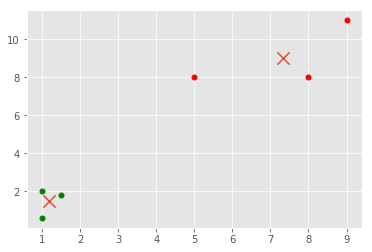

In [39]:
colors = ["g.","r.","c.","y."]

for i in range(len(X)):
    print("coordinate:",X[i], "label:", labels[i])
    plt.plot(X[i][0], X[i][1], colors[labels[i]], markersize = 10)


plt.scatter(centroids[:, 0],centroids[:, 1], marker = "x", s=150, linewidths = 5, zorder = 10)

plt.show()

#observando alguns resultados do cluster

# a lista de cores é uma lista que fornecemos para a máquina 
# escolher durante a classificação para facilitar a visualização
# neste caso só foram necessárias duas mas dependendo da quantidade
# de clusters podemos precisar de mais.

#novamente os labels são os nomes de cada grupo que o programa deu


In [40]:
#após a primeira iteração podem ser feitas uma série de implementções
#como cluster multi dimensional e hierárquico.
#demonstrarei mais a seguir.

In [41]:
#Para implementar o clusterização hierárquica usaremos o algoritmo
#chamado "mean shift" (deslocamento de média) 

from sklearn.cluster import MeanShift
from sklearn.datasets.samples_generator import make_blobs

In [42]:
#criando um dataset para o exemplo usando make_blobs
centers = [[1,1],[5,5],[3,10]]
X, _ = make_blobs(n_samples = 500, centers = centers, cluster_std = 1)

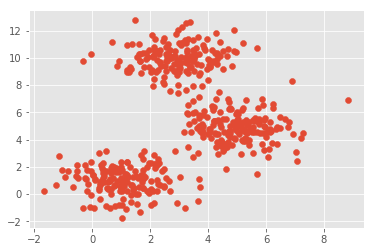

In [43]:
#visualizando os dados gerados em volta dos pontos de centro:

plt.scatter(X[:,0],X[:,1])
plt.show()

In [44]:
#agora queremos que a máquina reconheça os 3 clusters existentes

ms = MeanShift()
ms.fit(X)
labels = ms.labels_
cluster_centers = ms.cluster_centers_

#inicializamos o mean shift e fazemos um "fit" do dataset.
#agora fazemos a máquina gerar os labels e os clusters points
#esses labels são diferentes do unpacked-y

In [45]:
#agora comparamos os centros dos clusters gerados pela análise da
#máquina com os que demos input para verificar a precisão.

print("centros de clusters estimados:")
print(cluster_centers)
n_clusters_ = len(np.unique(labels))
print("Number of estimated clusters:", n_clusters_)
print("")
print("centros de cluster original:")
print(centers)

centros de clusters estimados:
[[ 4.91923605  4.91892001]
 [ 1.04988533  1.0136259 ]
 [ 2.93819199  9.9601093 ]]
Number of estimated clusters: 3

centros de cluster original:
[[1, 1], [5, 5], [3, 10]]


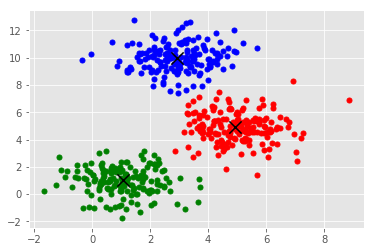

In [46]:
#vê-se uma proximidade exelente entre os centros gerados e originais

colors = 10*['r.','g.','b.','c.','k.','y.','m.'] #lista de cores para o gráfico

#visualizando os dados:

for i in range(len(X)):
    plt.plot(X[i][0], X[i][1], colors[labels[i]], markersize = 10)

plt.scatter(cluster_centers[:,0],cluster_centers[:,1],
            marker="x",color='k', s=150, linewidths = 5, zorder=10)

plt.show()

In [47]:
#vemos então que nosso programa conseguiu clusterizar os dados
#extremamente bem (próximo do modelo original)!

[[ 0.99451051  1.07619641  1.03394895]
 [ 4.87764514  4.86464296  4.93631636]
 [ 3.16906424  9.81071133  9.8932458 ]]
Number of estimated clusters: 3


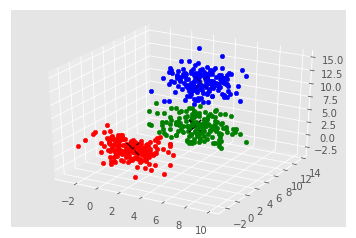

In [48]:
#agora testaremos o algoritmo com um modelo mais complexo em 3 dimensões

from mpl_toolkits.mplot3d import Axes3D #importando o módulo 3d

centers = [[1,1,1],[5,5,5],[3,10,10]]

X, _ = make_blobs(n_samples = 500, centers = centers, cluster_std = 1.5)



ms = MeanShift()
ms.fit(X)
labels = ms.labels_
cluster_centers = ms.cluster_centers_

print(cluster_centers)

n_clusters_ = len(np.unique(labels))

print("Number of estimated clusters:", n_clusters_)

colors = 10*['r','g','b','c','k','y','m']

#print(colors)
#print(labels)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for i in range(len(X)):

    ax.scatter(X[i][0], X[i][1], X[i][2], c=colors[labels[i]], marker='o')


ax.scatter(cluster_centers[:,0],cluster_centers[:,1],cluster_centers[:,2],
            marker="x",color='k', s=150, linewidths = 5, zorder=10)

plt.show()


In [49]:
#pode ser bom rodar o código mais de uma vez e compará-lo a seus dados uma vez que o programa pode errar as vezes dado que os
#dados são gerados randomicamente (neste caso).

In [50]:
# para a implementação de nosso projeto teremos uma análise um tanto mais complexa pois usaremos bem mais do que 3 dimensões.

In [51]:
#começaremos filtrando a database pelas colunas desejadas:
#df1 = df.loc[:, ['a', 'b']]

dados_filt=dados.loc[:,["firstName", "lastName", "position", "height", "weight", "acceleration", "aggression", "agility", "ballcontrol", "crossing", "finishing", "dribbling", "gkpositioning", "gkreflexes", "longpassing", "marking", "strength", "vision", "atkWorkRate", "defWorkRate", "skillMoves", "interceptions", "slidingtackle"]]

In [52]:
dados_filt

,firstName,lastName,position,height,weight,acceleration,aggression,agility,ballcontrol,crossing,...,gkreflexes,longpassing,marking,strength,vision,atkWorkRate,defWorkRate,skillMoves,interceptions,slidingtackle
0,Edson,Arantes Nascimento,CF,174,70,95,55,94,94,87,...,6,85,48,71,96,High,Low,5,61,42
1,C. Ronaldo,dos Santos Aveiro,LW,185,80,91,63,90,92,84,...,11,72,22,80,85,High,Low,5,29,23
2,Lionel,Messi,RW,170,72,92,48,90,95,77,...,8,87,13,59,90,Medium,Medium,4,22,26
3,Franz,Beckenbauer,CB,181,75,83,63,80,89,64,...,8,94,94,86,82,High,Medium,3,96,91
4,Paolo,Maldini,LB,187,85,87,66,65,72,83,...,10,79,95,84,68,Medium,High,2,94,94
5,Franco,Baresi,CB,176,70,77,79,75,89,58,...,5,83,94,79,68,Medium,Medium,2,95,92
6,Manuel,Neuer,GK,193,92,58,29,52,48,15,...,89,59,10,83,70,Medium,Medium,1,30,11
7,Luis,Suárez,ST,182,85,88,78,86,91,77,...,37,64,30,76,84,High,Medium,4,41,38
8,Neymar,da Silva Santos Jr.,LW,174,68,93,56,96,95,75,...,11,75,21,49,80,High,Medium,5,36,33
9,Lothar,Matthäus,CDM,174,71,88,93,74,87,81,...,7,90,87,75,91,High,High,3,91,90


In [53]:
#convertendo dados qualitativos em quantitativos:

dados_filt.loc[(dados_filt.atkWorkRate=="High"), "Atk"]=10
dados_filt.loc[(dados_filt.atkWorkRate=="Medium"), "Atk"]=5
dados_filt.loc[(dados_filt.atkWorkRate=="Low"), "Atk"]=0

dados_filt.loc[(dados_filt.defWorkRate=="High"), "Def"]=10
dados_filt.loc[(dados_filt.defWorkRate=="Medium"), "Def"]=5
dados_filt.loc[(dados_filt.defWorkRate=="Low"), "Def"]=0


In [54]:
dados_filt.columns

Index(['firstName', 'lastName', 'position', 'height', 'weight', 'acceleration',
       'aggression', 'agility', 'ballcontrol', 'crossing', 'finishing',
       'dribbling', 'gkpositioning', 'gkreflexes', 'longpassing', 'marking',
       'strength', 'vision', 'atkWorkRate', 'defWorkRate', 'skillMoves',
       'interceptions', 'slidingtackle', 'Atk', 'Def'],
      dtype='object')

In [55]:
#removendo qualitativas:
del dados_filt["atkWorkRate"]
del dados_filt["defWorkRate"]